![ChinesePod](https://chinesepod.com/instapage/academic_offers/32689996-0-logo-black.png)
# ChinesePod Exploratory Data Analysis

This jupyter notebook will read in the data scraped from the ChinesePod website using the notebook [ChinesePod-Library.ipynb](ChinesePod-Library.ipynb). In this notebook we will simply answer a few basic questions we have about ChinesePod and visualise the data.

The purpose of this project is for me to become familiar with web scraping and how to wrangle the data into a usable format. I chose this as a project because I have been studying Chinese (普通话）for a while and I am interested in subscribing to their service. I have watched many of their freely available videos on Youtube and their material appears to be of very high quality. The reason I am considering subscribing to their service is that I think it may help improve my listening skills and extend my vocabulary.

A few questions for which I would like to find answers:

- How many of levels are there and how many lessons in each level?
- What are their names?
- How many lessons for each level.
- How many video lessons?
- How many audio only lessons?
- How many different teachers are there?
- How often do they produce lessons?
- How long have they been making lessons?
- They haven't always made video lessons, how long have they been doing this?
- What are the most common topics covered in the lessons?
- and so on ....

We will also correct a few minor inconsistencies in the scraped data and output a new cleaned dataset.

## Imports

In [1]:
import pandas as pd # data analysis
import numpy as np # arrays, linear algebra etcetera
import matplotlib.pyplot as plt # general plotting
from collections import OrderedDict
import matplotlib as mpl # for figure quality (dpi)
from pandas.plotting import register_matplotlib_converters # included to avoid warning when plotting 
register_matplotlib_converters()
import os # path handling
import re # regular expressions
from wordcloud import WordCloud, STOPWORDS  # for word cloud

## Formatting 

In [2]:
# Fontsize
fs = 12

# Extracted from www.chinesepod.com using colorzilla except for Other!
colors_dic = {'Newbie':'#2487C1', 'Elementary':'#35C567', 'Pre Intermediate':'#F7B501',
          'Intermediate':'#FF4C0F','Upper Intermediate':'#E1001E','Advanced':'#88006B',
          'Media':'#003041','Other':'#FF55A3'}

# Figure quality
mpl.rcParams['figure.dpi']= 100 # in notebook resolution
mpl.rc("savefig", dpi=400) # higher resolution when saving

# Set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# Set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']= 1
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

## Data (INPUT: Path to ChinesePod data)

In [3]:
local_CP_dir = './data'

## Images 

In [4]:
# Create directory if doesn't already exist
img_directory = './images'
if not os.path.exists(img_directory):
    os.mkdir(img_directory)
    print("Directory: " , img_directory ,  " created.")

Directory:  ./images  created.


Load data into dataframe

In [5]:
store = pd.HDFStore(local_CP_dir+'/ChinesePod-Library.h5', 'r')
data = store['data']

Column names

In [6]:
data.columns

Index(['Key', 'Name', 'Level', 'Series', 'URL', 'Teachers', 'Date', 'Video',
       'Tags', 'Functions', 'ImageURL', 'Description'],
      dtype='object')

Make 'Date' an actual date and set the 'Key' as the index as we assume this is unique.

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Key',inplace=True)
data.head()

,Name,Level,Series,URL,Teachers,Date,Video,Tags,Functions,ImageURL,Description
Key,,,,,,,,,,,
QW0465,Five ways of seeing: 看、见、看见、看到、看出,Pre-Intermediate,Qing Wen,https://chinesepod.com/lesson-redirect?v3id=QW...,"[Joy, Joe]",2020-01-10,True,"[video, synonyms]",[],https://s3contents.chinesepod.com/extra/QW0465...,"11:19 \nIn this Qingwen, we answer a quest..."
4263,Animal Proverbs: Become a pig to catch a tiger,Intermediate,Intermediate,https://chinesepod.com/lesson-redirect?v3id=4263,"[Joy, Joshua]",2020-01-08,True,"[video, animal proverbs, animals]",[],https://s3contents.chinesepod.com/4263/400906d...,10:07 \n\nAnimal metaphors are prevalent i...
4423,相见恨晚——老电影,Upper Intermediate,Upper Intermediate,https://chinesepod.com/lesson-redirect?v3id=4423,"[Mikkelson, Peony]",2020-01-06,False,"[movies, film]",[],https://s3contents.chinesepod.com/4423/7bbf9e1...,“有心栽花花不开，无心插柳柳成荫。”费尽心思种下的花朵迟迟不开，随手插下的柳枝却长成一片树荫...
4272,Character mind map: 客 guest,Elementary,Elementary,https://chinesepod.com/lesson-redirect?v3id=4272,"[Joy, Joe]",2020-01-03,True,"[video, Character Mind Map, character]",[],https://s3contents.chinesepod.com/4272/733551a...,"9:15 \n\n\nIn Chinese, you often encounter..."
4271,How To Use Action Complete “le” 了,Pre Intermediate,Pre Intermediate,https://chinesepod.com/lesson-redirect?v3id=4271,"[Joshua, Jessica]",2019-12-31,True,"[video, grammar, le, actions]",[],https://s3contents.chinesepod.com/4271/7665f59...,"10:28 \nIn this lesson, we're learning the..."


## How many lessons?

### In total?
Every entry is a lesson

In [8]:
numOfLessons = len(data)
print(numOfLessons)

4305


### How many levels?

In [9]:
data['Level'].nunique()

14

### What are they?

In [10]:
levelNames = data['Level'].unique().tolist()
print(levelNames)

['Pre-Intermediate', 'Intermediate', 'Upper Intermediate', 'Elementary', 'Pre Intermediate', 'Newbie', 'Any', 'Advanced', 'Media', 'Upper-Intermediate', 'News and Features', 'Poems with Pete', 'Dear Amber', 'Movie Madness']


Obviously, Upper Intermediate and Upper-Intermediate are meant to be the same, so we will change Upper-Intermediate to Upper Intermediate.

In [11]:
len(data[data['Level'] == 'Upper Intermediate'])

600

In [12]:
len(data[data['Level'] == 'Upper-Intermediate'])

39

In [13]:
data = data.replace('Upper-Intermediate','Upper Intermediate')

The entries with Levels set to 'Any', 'News and Features', 'Poems with Pete', 'Dear Amber', 'Movie Madness' are not actually levels. We will change these to 'Other'. The lesson counts for these are as follows:

In [14]:
suspect_levels = ['Any', 'News and Features', 'Poems with Pete', 'Dear Amber', 'Movie Madness']
total = 0

for suspect in suspect_levels:
    
    N = len(data[data['Level'] == suspect])
    print(suspect, ': ', N)
    
    # running total
    total += N
    
    # Change to other
    data.loc[data['Level'] == suspect, 'Level'] = 'Other'
    
print('Total: ',total)    

Any :  268
News and Features :  59
Poems with Pete :  20
Dear Amber :  70
Movie Madness :  44
Total:  461


In [15]:
data.loc[data['Level'] == 'Other','Level']

Key
JM0001     Other
QW0463     Other
QW0461     Other
HT0008     Other
HT0010     Other
           ...  
CM0004     Other
N0001      Other
CM0003     Other
CM0002     Other
WELCOME    Other
Name: Level, Length: 461, dtype: object

In [16]:
levelNames = data['Level'].unique().tolist()
print(levelNames)
print(len(levelNames))

['Pre-Intermediate', 'Intermediate', 'Upper Intermediate', 'Elementary', 'Pre Intermediate', 'Newbie', 'Other', 'Advanced', 'Media']
9


So there are 7 actual levels and then 'Other'.

### How many lessons in each actual level? 

How many with video?

In [17]:
len(data[data['Video']==True])

353

How many with audio only?

In [18]:
len(data[data['Video']==False])

3952

There are a number of different ways to obtain this information, we use **groupby(  )** 

In [19]:
g = data.groupby('Level',sort=False) # sort = False keeps it the same order

# Obviously, the order is as follows:
level_order = ['Newbie','Elementary','Pre Intermediate','Intermediate', 
               'Upper Intermediate', 'Advanced', 'Media', 'Other']

colors = []

lessonCount = []

for lo in level_order:
    
    # Data for this level
    level_df = g.get_group(lo)
    
    # Name of level
    level = level_df.iloc[0].Level

    # Number of lessons in level
    totalNumOfLessons = len(level_df)
    
    # Number of lessons with video
    numOfVideos = len(level_df[level_df['Video']==True])
    
    # Number of lessons with audio only
    numOfAudioOnly = len(level_df[level_df['Video']==False])
    
    # Percentage of lessons with video
    percentage = numOfVideos/totalNumOfLessons*100
    
    # An array containing the number of lessons for each level
    lessonCount.append(totalNumOfLessons)
    
    # Create an array of colours for each level (used for plotting below)
    colors.append(colors_dic[level])
    
    print(level+': ')
    print('-------------')
    print('Num. Of Lessons: ',totalNumOfLessons)
    print('Num. Of Videos: ',numOfVideos)
    print('Num. Of Audio Only: ',numOfAudioOnly)
    print('Percentage Of lessons with Video: ',percentage,'%')
    print('\n')


Newbie: 
-------------
Num. Of Lessons:  498
Num. Of Videos:  80
Num. Of Audio Only:  418
Percentage Of lessons with Video:  16.06425702811245 %


Elementary: 
-------------
Num. Of Lessons:  994
Num. Of Videos:  85
Num. Of Audio Only:  909
Percentage Of lessons with Video:  8.551307847082496 %


Pre Intermediate: 
-------------
Num. Of Lessons:  36
Num. Of Videos:  23
Num. Of Audio Only:  13
Percentage Of lessons with Video:  63.888888888888886 %


Intermediate: 
-------------
Num. Of Lessons:  1031
Num. Of Videos:  84
Num. Of Audio Only:  947
Percentage Of lessons with Video:  8.147429679922405 %


Upper Intermediate: 
-------------
Num. Of Lessons:  639
Num. Of Videos:  27
Num. Of Audio Only:  612
Percentage Of lessons with Video:  4.225352112676056 %


Advanced: 
-------------
Num. Of Lessons:  463
Num. Of Videos:  23
Num. Of Audio Only:  440
Percentage Of lessons with Video:  4.967602591792657 %


Media: 
-------------
Num. Of Lessons:  182
Num. Of Videos:  0
Num. Of Audio Only:  

It is possible to access a particular level by using **get_group(  )**

In [20]:
Newbie_df = g.get_group('Newbie')
print(len(Newbie_df))

498


It is also possible to get a summary of the number of lessons in each level by simply using **apply( )**

In [21]:
g.apply(len)

Level
Pre-Intermediate         1
Intermediate          1031
Upper Intermediate     639
Elementary             994
Pre Intermediate        36
Newbie                 498
Other                  461
Advanced               463
Media                  182
dtype: int64

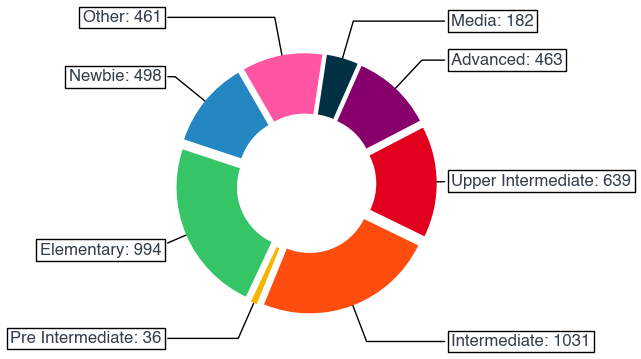

In [22]:
# A doughnut (or annulus) graph
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

# Space out the wedges
explode = (0.08, 0.08, 0.08, 0.08,0.08,0.08,0.08,0.08)

# Not really a pie chart any more
wedges, texts = ax.pie(lessonCount,explode=explode,colors=colors, wedgeprops=dict(width=0.5), startangle=120)

# Text boxes
bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

# Annotations
for i, w in enumerate(wedges):
    
    # Angle for the middle of the wedge
    ang = (w.theta2 - w.theta1)/2. + w.theta1
    
    # Get (x,y) coordinates
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    # Determines which side the label will appear on
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    # Connecting line
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    # Label
    ax.annotate(level_order[i] + ': ' + str(lessonCount[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw,fontsize=fs)

# Save it
plt.savefig(os.path.join(img_directory,'ChinesePod_numOfLessons.png'), bbox_inches="tight")

## How many teachers? Who were they?

In the Teachers column I have noticed that Jenny (many lessons) and Jenny Zhu (only a few) appear in the list.
From using ChinesePod I know that Jenny should actually be Jenny Zhu as she appears in most of the lessons. She quite often appears with Ken and John. There maybe other issues with the Teachers field, but I have no further information to improve this data. I will update Jenny to be Jenny Zhu.

In [23]:
data.Teachers.value_counts()

[Jenny,  Ken]                      407
[Jenny, John]                      341
[Constance Fang, Fiona Tian]       216
[Jenny,  John]                     206
[Dilu, John]                       206
                                  ... 
[Sissy, Rebecca]                     1
[Jenny, Shanell, David]              1
[John, Jenny, Sarah, Catherine]      1
[Jenny,  Clay,  John b]              1
[Jenny,  肖霞,  Connie]                1
Name: Teachers, Length: 375, dtype: int64

In [24]:
def change_teachers_name(data,old_name,new_name):
    
    new_data = data.copy()
    local = data.Teachers.copy()
    
    for i,names in enumerate(local):
        names = [re.sub(old_name+'?$', new_name, n) for n in names]
        local.iloc[i] = names
        
    new_data.Teachers = local
    
    return new_data

In [25]:
data = change_teachers_name(data=data,old_name='Jenny',new_name='Jenny Zhu')

In [26]:
data.Teachers.value_counts()

[Jenny Zhu,  Ken]                     407
[Jenny Zhu, John]                     341
[Constance Fang, Fiona Tian]          216
[Dilu, John]                          206
[Jenny Zhu,  John]                    206
                                     ... 
[Jenny Zhu,  Jiaojie]                   1
[Ken Carroll,  Hank Horkoff]            1
[Jenny Zhu, Ryan, Jenny Zhu, Ryan]      1
[Matt,  Lane,  Jenny Zhu]               1
[Catherine, David]                      1
Name: Teachers, Length: 370, dtype: int64

Create a set of teachers (each teacher appears only once) and a dictionary using the person as a key and the number of lessons they taught as the value.

In [27]:
# A set of unique ChinesePod teachers
ChinesePodTeachers = set()

# Dictionary keys = teacher names, values = the number of lessons they taught
lessonsTaughtBy = {}

# Each lesson can have multiple teachers
for i,lessonTeachers in enumerate(data['Teachers']):
    
    # Loop over teachers teaching the lesson
    for person in lessonTeachers:
        
        # To simplify comparison and format the string correctly
        person = person.strip().title()
           
        if person == '':
            # If the name is an empty string remove it
            data['Teachers'][i].remove('')
            
        elif person not in ChinesePodTeachers:
            
            # If the person is not already a known teacher add them to the set of ChinesePodTeachers
            ChinesePodTeachers.add(person)
            
            # Since they are new this is their first lesson
            lessonsTaughtBy[person] = 1
            
        else:
            
            # Since they are not new, increment the number of lessons they have taught
            lessonsTaughtBy[person] += 1        

In [28]:
print('Number of Teachers: ',len(ChinesePodTeachers))
print('Names: ')
print(ChinesePodTeachers)

Number of Teachers:  108
Names: 
{'Yuqin', 'Yamhey', 'Karl Ryan', 'David', 'Elsha', 'Lucille', 'Tamia', 'Elijah', 'Fiona Tian', 'Pete', 'Julie', 'Aggie Xiang', 'Jessica', 'Iona Tian', 'Lisa', 'Kathy', 'Rebecca', 'Daini', 'Ellie', 'Kitty', 'Hank Horkoff', 'Yuan Lin', 'Natasha', 'Ross', 'Constance Fang', 'Ken', 'Liliana', 'Jenny', 'John B', 'Adam', 'Matt', 'Grace', 'Chi', 'Deven', 'Tom', '肖霞', 'Shen Yajin', 'Jenny Zhu', 'Dilu', 'Shanghai', 'Diana', 'Aggie', 'John', 'Cherry', '乐观', 'Anna', 'Jp', 'Connie', 'Issy', 'Jen', 'Sarah', 'Gwilym James', 'Jason', 'Peony', 'Clay Roup', 'Kate', 'Wang Ping', 'Crystal', 'Catherine', 'Sandra', 'Jin Xin', 'Jeff', 'John Biesnecker', 'Ash', 'Chinesepod Crew', 'David Lancashire', 'Lane', 'Vera', 'John Pasden', 'Cathy', 'Sophie', 'Aric', 'Joshua', 'Elliott', 'Maurice', 'Clay', 'Michael', 'Gwilym', 'Amber', 'Lyn', 'Shanelle', 'Shadow', 'Justin', 'Alice', 'Joy', 'Ryan', 'Sissy', 'Dave', 'Eileen', 'Eileen Li', 'Greg', 'Joe', 'Jiaojie', 'Dino', '娇杰', 'Zeng', 'Ke

### How many lessons did each teacher appear in?

In [29]:
names = []
numOfLessons = []
for key, value in sorted(lessonsTaughtBy.items(), key=lambda item: item[1],reverse=True):
    names.append(key)
    numOfLessons.append(value)
    print("%s: %s" % (key, value))

Jenny Zhu: 1804
John: 1484
Fiona Tian: 657
Ken: 622
Connie: 541
Dilu: 419
Jenny: 405
David: 394
Constance Fang: 356
Gwilym: 282
Greg: 198
Amber: 181
Vera: 176
Tom: 147
Jiaojie: 117
肖霞: 91
Liliana: 74
Ryan: 70
Pete: 70
Peony: 58
Shanell: 54
Clay: 53
Catherine: 49
Joy: 45
Jason: 43
Grace: 33
Mikkelson: 31
Dave: 30
Joe: 29
Aggie: 25
Joshua: 23
Matt: 23
Jen: 19
Elliott: 18
Diana: 17
John B: 17
Gwilym James: 16
Sarah: 16
Zeng: 15
Sophie: 13
Tamia: 12
Jp: 11
乐观: 11
Jessica: 10
Adam: 10
John Pasden: 10
Guest: 9
Ellie: 7
Elijah: 7
Lyn: 6
Kathy: 5
Daini: 5
Yuan Lin: 4
Maurice: 4
Ken Carroll: 4
Alice: 3
Anna: 3
Iona Tian: 3
Michael: 3
Eileen Li: 3
Jeff: 3
Meng Fan: 2
Tam: 2
Sissi: 2
Sissy: 2
Rebecca: 2
Yuqin: 2
Wang Ping: 2
Natasha: 2
Chinesepod Crew: 2
Ariel: 2
Dino: 2
Rob: 2
Lane: 2
Clay，Connie: 2
David Lancashire: 2
Chi: 1
Yamhey: 1
Lucille: 1
Deven: 1
Crystal: 1
Julie: 1
Kitty: 1
Ash: 1
Elsha: 1
Sandra: 1
Cathy: 1
Shadow: 1
Issy: 1
Cherry: 1
Lisa: 1
Karl Ryan: 1
Shanelle: 1
Justin: 1
Shen Ya

### Who are the 10 teachers that appeared in the most lessons?

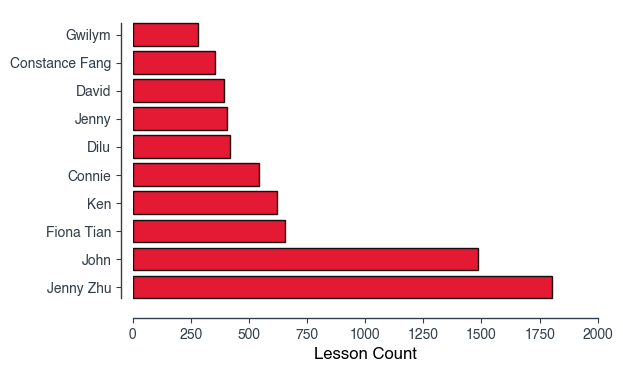

In [30]:
# Bar graph 
fig = plt.figure(figsize=(6,4))

# Plot the bar graph horizontally
plt.barh(list(range(len(names[0:10]))), numOfLessons[0:10], align='center',
         alpha=0.9,color=colors_dic['Upper Intermediate'],edgecolor='black')

# Ticks
plt.yticks(range(len(names[0:10])), labels=names[0:10],fontsize=fs)
plt.yticks()
plt.xticks(fontsize=fs)

# Limit
plt.xlim([0,2000])

# X label
plt.xlabel('Lesson Count',fontsize=fs)

# Change the style of the axis spines
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# Set the spines position
ax.spines['bottom'].set_position(('axes', -0.02))
ax.spines['left'].set_position(('axes', -0.025))

# Save it
plt.savefig(os.path.join(img_directory,'ChinesePod_Teachers10.png'), bbox_inches="tight")

## What tags are there?

In [31]:
# A set of unique tags
Tags = set()

# Dictionary keys = tag, values = the number of lessons with that tag
TagCount = {}

# Each lesson can have multiple tags
for i,lessonTags in enumerate(data['Tags']):
    
    # Loop over tags for the current lesson
    for tag in lessonTags:
        
        # To simplify comparison and format the string correctly
        tag = tag.strip().title()
        
        # If the tag is an empty string remove it
        if tag == '':
            data['Tags'][i].remove('')
            
        elif tag not in Tags:
            # If the tag is not already a known tag add it to the set of Tags
            Tags.add(tag)
            # Since they are new this is their first lesson
            TagCount[tag] = 1
        else:
            # Since they are not new, increment the number of lessons they have taught
            TagCount[tag] += 1
        

In [32]:
print('Number of Tags: ',len(Tags))
print('Tags: ')
print(Tags)
print('Total distinct tags: ',len(Tags))

Number of Tags:  1849
Tags: 
{'Asmr', 'Ikea', 'Mother', 'Plagiarism', 'Takeout', '美国', 'Backpack', 'Job Interviews', 'Phone', 'Sick', 'Hazelnuts', 'Netizen', 'Mahjong', 'Mystery', 'Enterprise', 'Hide And Seek', 'Korea', 'Bathe', 'Groups', 'House', 'Fairy Tale', 'Zoo', 'Bodybuilding', 'Soup', 'Shikumen', 'Hemp', 'Studies', 'Cabbie', 'Rock Music', 'Jewish', 'Farewell', 'Swimming', 'Special Olympics', 'Ring Road', 'Prize', 'Relationships', 'Fever', 'Advertising', 'Topics', 'Chat', 'Clever', 'Excited', 'Shanghai Expo', 'Air Line', 'Chinese', 'Extort', 'Pokemon', 'Union', 'Seafood', 'Announcement', 'Slogan', 'Microsoft', 'Expiration Date', 'Memories', 'Metro', 'Time Travel', 'Concubine', 'Skating', 'Sleep', 'Supplier', 'Ordering', 'Dolphin', 'Migraine', 'System', 'High-Speed Train', 'Membership', 'Management', '投资', 'Missile', 'Wenzhou', 'Modals', 'Adoption', 'Wind', 'Who', 'Bathing', 'Singing', 'Entertainment', 'Paint', 'Diy', 'Province', 'Riddle', 'Harbin', 'Security', 'Year Of The Tiger'

In [33]:
tags = []
count = []
for key, value in sorted(TagCount.items(), key=lambda item: item[1],reverse=True):
    tags.append(key)
    count.append(value)

### What a the top 10 most common lesson tags?

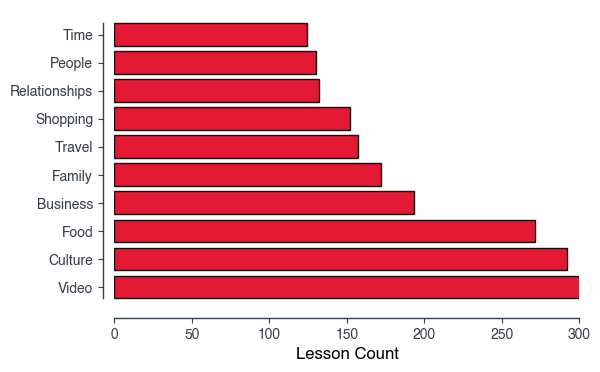

In [34]:
# Only want the top N = 10 tags
topN = 10

# Bar graph
fig = plt.figure(figsize=(6,4))

# Plot the bar graph horizontally
plt.barh(range(len(tags[0:topN])), count[0:topN], align='center',
         alpha=0.9,color=colors_dic['Upper Intermediate'],edgecolor='black')

# Ticks
plt.yticks(range(len(tags[0:topN])), tags[0:topN],fontsize=fs)
plt.xticks(fontsize=fs)

# X limit
plt.xlim([0,300])

# X label
plt.xlabel('Lesson Count',fontsize=fs)

# Change the style of the axis spines
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# Set the spines position
ax.spines['bottom'].set_position(('axes', -0.02))
ax.spines['left'].set_position(('axes', -0.025))

# Save it
plt.savefig(os.path.join(img_directory,'ChinesePod_Tags10.png'), bbox_inches="tight")

Note that the most common tag is Video, but this is related the format of the lesson rather than the content.

### Tag word cloud

In [35]:
# All tags including duplicates from appearing in multiple lessons
# To be used for word cloud
total_Tags = data.Tags.sum() 
print(total_Tags)
print('Total tags: ',len(total_Tags))

['video', 'synonyms', 'video', 'animal proverbs', 'animals', 'movies', 'film', 'video', 'Character Mind Map', 'character', 'video', 'grammar', 'le', 'actions', 'study', 'language', 'Chinese', 'video', 'music', 'popular', 'songs', 'holiday', 'New Year', 'holiday', 'interview', 'video', 'food', 'restaurant', 'questions', 'asking questions', 'animal proverbs', 'animals', 'fish', 'video', 'culture', 'Sun Tzu', 'history', 'literature', 'military', 'strategy', 'books', 'culture', 'grammar', 'vocabulary', 'video', 'HSK', 'love', 'video', 'HSK', 'greetings', 'video', 'HSK', 'introductions', 'small talk', 'video', 'HSK', 'video', 'HSK', 'hungry', 'video', 'HSK', 'buying', 'video', 'HSK', 'phone', 'weather', 'video', 'HSK', 'family name', 'video', 'HSK', 'drink', 'video', 'HSK', 'doctor', 'eating', 'video', 'HSK', 'love', 'leisure', 'video', 'HSK', 'introductions', 'hobbies', 'video', 'HSK', 'test', 'introductions', 'news on the go', 'news', 'emotions', 'pressure', 'tone change series', 'tones',

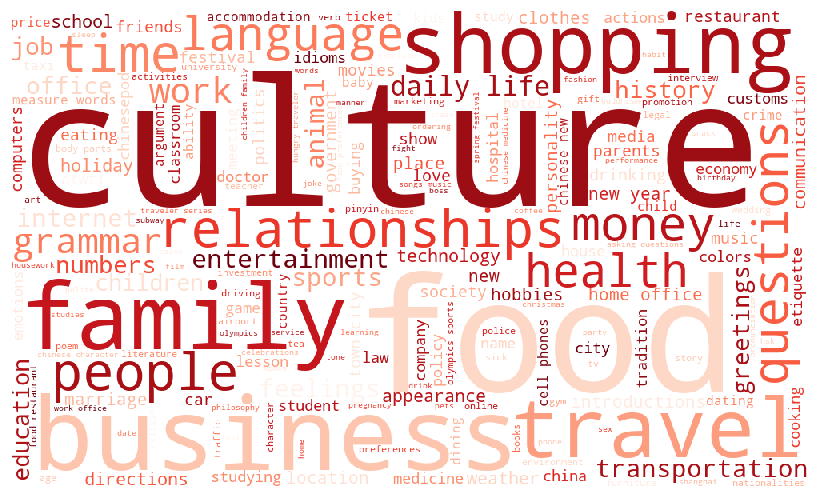

In [36]:
# Words to include in the word cloud
words = ' '

# Words not to include in the word cloud
stopwords = set(STOPWORDS) 

# Add Video to stop words, so it isn't included in the word cloud because it 
# is related to the format rather than the content of the lessons.
stopwords.add('Video') 

for tag in total_Tags: 
    words = words + tag.lower() + ' '

wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,colormap="Reds").generate(words) 

# Plot the word cloud                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

# Save it
plt.savefig(os.path.join(img_directory,'ChinesePod_Tags_Word_Cloud.png'), bbox_inches="tight")

## Lessons over time?

In [37]:
df = data.set_index('Date')

In [38]:
df.head() # Note data index is NOT UNIQUE

,Name,Level,Series,URL,Teachers,Video,Tags,Functions,ImageURL,Description
Date,,,,,,,,,,
2020-01-10,Five ways of seeing: 看、见、看见、看到、看出,Pre-Intermediate,Qing Wen,https://chinesepod.com/lesson-redirect?v3id=QW...,"[Joy, Joe]",True,"[video, synonyms]",[],https://s3contents.chinesepod.com/extra/QW0465...,"11:19 \nIn this Qingwen, we answer a quest..."
2020-01-08,Animal Proverbs: Become a pig to catch a tiger,Intermediate,Intermediate,https://chinesepod.com/lesson-redirect?v3id=4263,"[Joy, Joshua]",True,"[video, animal proverbs, animals]",[],https://s3contents.chinesepod.com/4263/400906d...,10:07 \n\nAnimal metaphors are prevalent i...
2020-01-06,相见恨晚——老电影,Upper Intermediate,Upper Intermediate,https://chinesepod.com/lesson-redirect?v3id=4423,"[Mikkelson, Peony]",False,"[movies, film]",[],https://s3contents.chinesepod.com/4423/7bbf9e1...,“有心栽花花不开，无心插柳柳成荫。”费尽心思种下的花朵迟迟不开，随手插下的柳枝却长成一片树荫...
2020-01-03,Character mind map: 客 guest,Elementary,Elementary,https://chinesepod.com/lesson-redirect?v3id=4272,"[Joy, Joe]",True,"[video, Character Mind Map, character]",[],https://s3contents.chinesepod.com/4272/733551a...,"9:15 \n\n\nIn Chinese, you often encounter..."
2019-12-31,How To Use Action Complete “le” 了,Pre Intermediate,Pre Intermediate,https://chinesepod.com/lesson-redirect?v3id=4271,"[Joshua, Jessica]",True,"[video, grammar, le, actions]",[],https://s3contents.chinesepod.com/4271/7665f59...,"10:28 \nIn this lesson, we're learning the..."


In [39]:
df.loc['2019-12-04']

,Name,Level,Series,URL,Teachers,Video,Tags,Functions,ImageURL,Description
Date,,,,,,,,,,
2019-12-04,Lesson 1 - The Dish,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4245,[Sophie],True,"[video, HSK, love]",[],https://s3contents.chinesepod.com/4245/6596627...,"In today's dialogue, a self-introduction was m..."
2019-12-04,Lesson 2 - Hello Toilet,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4246,[Sophie],True,"[video, HSK, greetings]",[],https://s3contents.chinesepod.com/4246/008a067...,"In today's dialogue, we're going to learn how ..."
2019-12-04,Lesson 3 - I’m Just A Car,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4247,[Sophie],True,"[video, HSK, introductions, small talk]",[],https://s3contents.chinesepod.com/4247/ce4f9a9...,"In today's dialogue, a call was made by mistak..."
2019-12-04,Lesson 4 - Man or Machine,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4248,[Sophie],True,"[video, HSK]",[],https://s3contents.chinesepod.com/4248/959b5d0...,"In today's dialogue, a vending machine is goin..."
2019-12-04,Lesson 5 - Hungry Washer,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4249,[Sophie],True,"[video, HSK, hungry]",[],https://s3contents.chinesepod.com/4249/f3aebf4...,Oh no! A hungry washer is eating all of the la...
2019-12-04,Lesson 6 - Buying Some Good Stuff,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4250,[Sophie],True,"[video, HSK, buying]",[],https://s3contents.chinesepod.com/4250/9469261...,Footsteps in the dark. Whispers in a call. Oh ...
2019-12-04,Lesson 7 - Weather Woes,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4251,[Sophie],True,"[video, HSK, phone, weather]",[],https://s3contents.chinesepod.com/4251/5f46e81...,Have you ever wondered what makes it rain? In ...
2019-12-04,Lesson 8 - Sister Come Home,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4252,[Sophie],True,"[video, HSK, family name]",[],https://s3contents.chinesepod.com/4252/e347754...,"In today's dialogue, we are going to listen to..."
2019-12-04,Lesson 9 - Care For A Drink,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4253,[Sophie],True,"[video, HSK, drink]",[],https://s3contents.chinesepod.com/4253/8b303e7...,A fight for a girl's attention between a cup a...


### How many lessons per month?

In [40]:
lessonsPerMonth = df['Name'].resample('M').count()

In [41]:
lessonsPerMonth

Date
2005-05-31     1
2005-06-30     0
2005-07-31     0
2005-08-31     0
2005-09-30     6
              ..
2019-09-30    10
2019-10-31    10
2019-11-30    11
2019-12-31    22
2020-01-31     4
Freq: M, Name: Name, Length: 177, dtype: int64

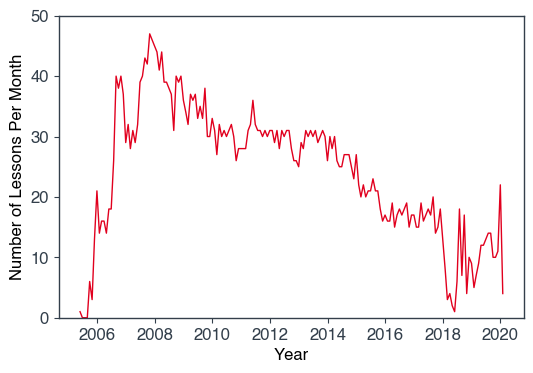

In [42]:
fig = plt.figure(figsize=(6,4))

plt.plot(lessonsPerMonth.index,lessonsPerMonth,color=colors_dic['Upper Intermediate'],linewidth=1)

# Y limit
plt.ylim(0,50)

# Labels
plt.xlabel(r"Year", fontsize=fs)
plt.ylabel(r"Number of Lessons Per Month",fontsize=fs)

# Ticks
plt.tick_params(labelsize=fs);

# Save it
plt.savefig(os.path.join(img_directory,'ChinesePod_TotalLessonsPerMonth.png'), bbox_inches="tight")

### How many years have they been producing lessons?

In [43]:
len(lessonsPerMonth.index)/12 # in years

14.75

### When did they start?

In [44]:
first = df.index.min()
print(first)

2005-05-19 00:00:00


In [45]:
df.loc[first]

Name                                       Welcome to ChinesePod
Level                                                      Other
Series                                         News and Features
URL            https://chinesepod.com/lesson-redirect?v3id=WE...
Teachers                                [Jenny Zhu,  Ken,  John]
Video                                                      False
Tags                                                          []
Functions                                                     []
ImageURL       https://s3contents.chinesepod.com/extra/WELCOM...
Description    We're happy to have you as the newest CPoddie ...
Name: 2005-05-19 00:00:00, dtype: object

In [46]:
df.loc[first].Name

'Welcome to ChinesePod'

In [47]:
df.loc[first].Description

"We're happy to have you as the newest CPoddie in town.  As a little welcome, we'd like to take this opportunity to introduce ourselves and the world of ChinesePod as you're soon to know it!  Please listen in to this podcast as Ken, Jenny, and John give you the low down on learning Mandarin and how to best take advantage of all ChinesePod has to offer!"

### When was the first video lesson produced? What was it?

In [48]:
VideoLessons = df[df['Video']==True]
AudioLessons = df[df['Video']==False]

In [49]:
first_video = VideoLessons.index.min()
print(first_video)

2008-09-01 00:00:00


In [50]:
VideoLessons.loc[first_video]

Name                                                     Traffic
Level                                                      Other
Series                                                Vocab Tour
URL            https://chinesepod.com/lesson-redirect?v3id=VT...
Teachers                                              [Shanghai]
Video                                                       True
Tags                                            [traffic, video]
Functions                                           [describing]
ImageURL       https://s3contents.chinesepod.com/extra/VT0001...
Description    In this video vocab tour, we take you to the b...
Name: 2008-09-01 00:00:00, dtype: object

In [51]:
VideoLessons.loc[first_video].Name

'Traffic'

In [52]:
VideoLessons.loc[first_video].Description

"In this video vocab tour, we take you to the bustling streets of Shanghai. As the traffic goes whizzing by, we'll introduce some of the more common Chinese modes of transportation. Learn the Mandarin Chinese for all these words in visual context, no translation required!"

### Most recent lesson in this dataset?

In [53]:
recent = df.index.max()
print(recent)

2020-01-10 00:00:00


In [54]:
df.loc[recent]

Name                           Five ways of seeing: 看、见、看见、看到、看出
Level                                           Pre-Intermediate
Series                                                  Qing Wen
URL            https://chinesepod.com/lesson-redirect?v3id=QW...
Teachers                                              [Joy, Joe]
Video                                                       True
Tags                                           [video, synonyms]
Functions                                                     []
ImageURL       https://s3contents.chinesepod.com/extra/QW0465...
Description    11:19     \nIn this Qingwen, we answer a quest...
Name: 2020-01-10 00:00:00, dtype: object

In [55]:
df.loc[recent].Name

'Five ways of seeing: 看、见、看见、看到、看出'

In [56]:
df.loc[recent].Description

'11:19     \nIn this Qingwen, we answer a question on our forum from user lukeaz: There are so many ways to say "see", including 看、见、看见、看到、看出, how do we distinguish them? \nLet\'s check out how to use all the different ways to say "see"! \nForum post: https://forum.chinesepod.com/t/all-the-different-ways-to-say-see/3977'

### How many lessons per level per month?

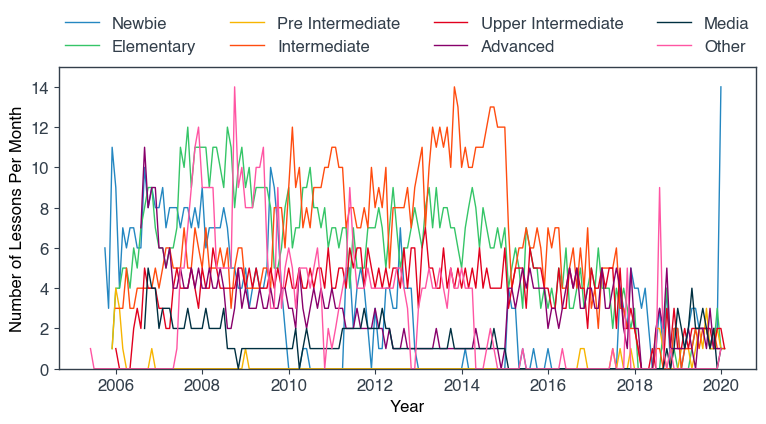

In [57]:
g = df.groupby('Level',sort=False) # sort = False keeps it the same order

fig = plt.figure(figsize=(9,4))

ax = fig.add_subplot(111)

# Loop over levels
for lo in level_order:
    
    # Data for this level
    level_df = g.get_group(lo)
    
    # Name of level
    level = level_df.iloc[0].Level    
    
    level_numLessonsPerMonth = level_df.Name.resample('M').count()
    ax.plot(level_numLessonsPerMonth.index,level_numLessonsPerMonth,
            color=colors_dic[level],label=level,linewidth=1)
    
# X ticks
ax.tick_params(labelsize=fs);

# Y limit
ax.set_ylim(0,15)

# Labels
ax.set_xlabel("Year", fontsize=fs)
ax.set_ylabel("Number of Lessons Per Month",fontsize=fs)

# Legend
ax.legend(frameon=False, bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, ncol=4, mode="expand", borderaxespad=0.,fontsize=fs)

# Save it
fig.savefig(os.path.join(img_directory,'ChinesePod_LevelLessonsPerMonth.png'), bbox_inches="tight")

### How many video and audio lessons per month?
We will consider only one level for simplicity. This could be repeated for the other levels

In [58]:
Newbie_df = g.get_group('Newbie')
Newbie_Videos = Newbie_df[Newbie_df['Video']==True]
Newbie_Audio = Newbie_df[Newbie_df['Video']==False]
print('Videos: ',len(Newbie_Videos))
print('Audio only: ',len(Newbie_Audio))

Videos:  80
Audio only:  418


In [59]:
audio_end = Newbie_Audio.index.max()
print(audio_end)

2015-05-18 00:00:00


In [60]:
video_start = Newbie_Videos.index.min()
print(video_start)

2015-08-17 00:00:00


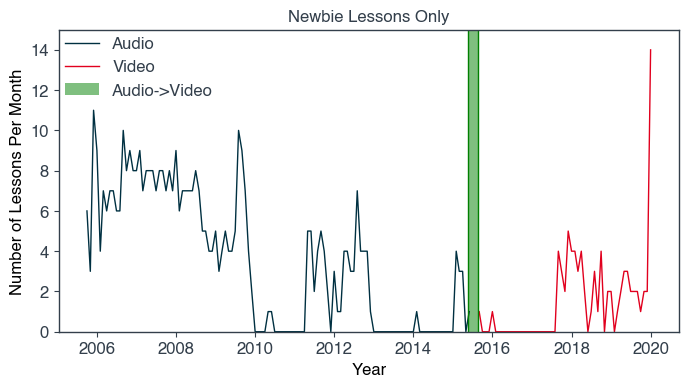

In [61]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(111)

# Video lessons per month
video_numLessonsPerMonth = Newbie_Videos.Name.resample('M').count()

# Audio lessons per month
audio_numLessonsPerMonth = Newbie_Audio.Name.resample('M').count()

# Plot audio and video lessons per month
ax.plot(audio_numLessonsPerMonth.index,audio_numLessonsPerMonth,color=colors_dic['Media'],label='Audio',linewidth=1)
ax.plot(video_numLessonsPerMonth.index,video_numLessonsPerMonth,color=colors_dic['Upper Intermediate'],label='Video',linewidth=1)

# Mark the obvious transition from audio to video lessons for the Newbie level
xcoords = [audio_end,video_start]
for xc in xcoords:
    plt.axvline(x=xc,color='green',linewidth=1,label=None)

y1 = 0
y2 = 15
ax.fill_between(xcoords,y1,y2,facecolor='green', alpha=0.5,label='Audio->Video')    

# Ticks
ax.tick_params(labelsize=fs);

# Y Limits
ax.set_ylim(0,15)

# Labels
ax.set_xlabel(r"Year", fontsize=fs)
ax.set_ylabel(r"Number of Lessons Per Month",fontsize=fs)

ax.set_title('Newbie Lessons Only',fontsize=fs)

# To avoid duplication of labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),frameon=False, loc='best', borderaxespad=0.,fontsize=fs)

# Save it
fig.savefig(os.path.join(img_directory,'ChinesePod_Newbie-Video-Audio-LessonsPerMonth.png'), bbox_inches="tight")

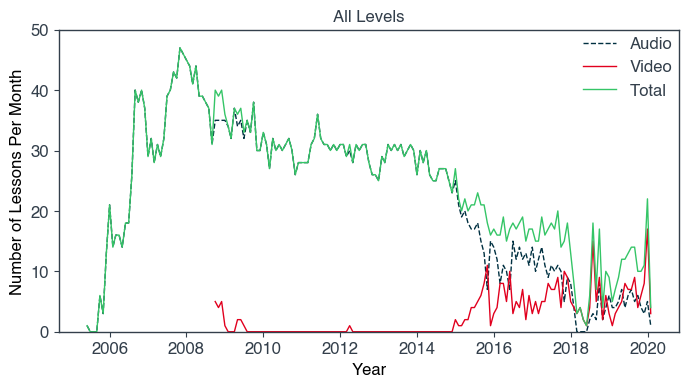

In [62]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(111)

# Audio lessons per month 
audio_numLessonsPerMonth = AudioLessons.Name.resample('M').count()

# Video lessons per month
video_numLessonsPerMonth = VideoLessons.Name.resample('M').count()

# Plot audio and video lessons per month
ax.plot(audio_numLessonsPerMonth.index,audio_numLessonsPerMonth,
        color=colors_dic['Media'],linestyle='--',label='Audio',linewidth=1)

ax.plot(video_numLessonsPerMonth.index,video_numLessonsPerMonth,
        color=colors_dic['Upper Intermediate'],label='Video',linewidth=1)

# Total number of lessons per month
total = pd.concat([audio_numLessonsPerMonth, video_numLessonsPerMonth], axis=1).sum(axis=1)

# Plot total number of lessons per month
ax.plot(total.index,total,
        color=colors_dic['Elementary'],label='Total',linewidth=1)

# X ticks
ax.tick_params(labelsize=fs);

# Y limits
ax.set_ylim(0,50)

# Labels
ax.set_xlabel(r"Year", fontsize=fs)
ax.set_ylabel(r"Number of Lessons Per Month",fontsize=fs)

# Title
ax.set_title('All Levels',fontsize=fs)

# Legend
ax.legend(frameon=False, loc='best', borderaxespad=0.,fontsize=fs)

# Save it
fig.savefig(os.path.join(img_directory,'ChinesePod_All-Levels-Video-Audio-LessonsPerMonth.png'), bbox_inches="tight")

In [63]:
type(video_numLessonsPerMonth)

pandas.core.series.Series

In [64]:
audio_numLessonsPerMonth.max()

47

In [65]:
audio_numLessonsPerMonth.min()

0

In [66]:
video_numLessonsPerMonth.min()

0

In [67]:
video_numLessonsPerMonth.max()

17

# Sort data by date 

In [68]:
sorted_data = data.sort_values(by='Date',ascending=False)

The 10 newest lessons are:

In [69]:
sorted_data.head(10) 

,Name,Level,Series,URL,Teachers,Date,Video,Tags,Functions,ImageURL,Description
Key,,,,,,,,,,,
QW0465,Five ways of seeing: 看、见、看见、看到、看出,Pre-Intermediate,Qing Wen,https://chinesepod.com/lesson-redirect?v3id=QW...,"[Joy, Joe]",2020-01-10,True,"[video, synonyms]",[],https://s3contents.chinesepod.com/extra/QW0465...,"11:19 \nIn this Qingwen, we answer a quest..."
4263,Animal Proverbs: Become a pig to catch a tiger,Intermediate,Intermediate,https://chinesepod.com/lesson-redirect?v3id=4263,"[Joy, Joshua]",2020-01-08,True,"[video, animal proverbs, animals]",[],https://s3contents.chinesepod.com/4263/400906d...,10:07 \n\nAnimal metaphors are prevalent i...
4423,相见恨晚——老电影,Upper Intermediate,Upper Intermediate,https://chinesepod.com/lesson-redirect?v3id=4423,"[Mikkelson, Peony]",2020-01-06,False,"[movies, film]",[],https://s3contents.chinesepod.com/4423/7bbf9e1...,“有心栽花花不开，无心插柳柳成荫。”费尽心思种下的花朵迟迟不开，随手插下的柳枝却长成一片树荫...
4272,Character mind map: 客 guest,Elementary,Elementary,https://chinesepod.com/lesson-redirect?v3id=4272,"[Joy, Joe]",2020-01-03,True,"[video, Character Mind Map, character]",[],https://s3contents.chinesepod.com/4272/733551a...,"9:15 \n\n\nIn Chinese, you often encounter..."
4271,How To Use Action Complete “le” 了,Pre Intermediate,Pre Intermediate,https://chinesepod.com/lesson-redirect?v3id=4271,"[Joshua, Jessica]",2019-12-31,True,"[video, grammar, le, actions]",[],https://s3contents.chinesepod.com/4271/7665f59...,"10:28 \nIn this lesson, we're learning the..."
4266,Is learning Chinese difficult?,Newbie,Newbie,https://chinesepod.com/lesson-redirect?v3id=4266,"[Joe, Lyn]",2019-12-27,True,"[study, language, Chinese, video]",[],https://s3contents.chinesepod.com/4266/fcd9823...,"11:3511:35 \n\n\nIn this newbie lesson, yo..."
JM0001,Chinese Love Songs (Part 1),Other,Journey into Mandopop,https://chinesepod.com/lesson-redirect?v3id=JM...,[Chi],2019-12-25,False,"[music, popular, songs, holiday]",[],https://s3contents.chinesepod.com/extra/JM0001...,2019 HOLIDAY SPECIAL: In our first ever episod...
4426,新年特辑：回首2019，展望2020,Upper Intermediate,Upper Intermediate,https://chinesepod.com/lesson-redirect?v3id=4426,"[Diana, Peony]",2019-12-23,False,"[New Year, holiday, interview]",[],https://s3contents.chinesepod.com/4426/f1c0ef9...,This is an interview between 2 upper intermedi...
4262,Too Many Questions,Elementary,Elementary,https://chinesepod.com/lesson-redirect?v3id=4262,"[Joe, Joy]",2019-12-19,True,"[video, food, restaurant, questions, asking qu...",[],https://s3contents.chinesepod.com/4262/4361a33...,"11:46 \n\n\nIn today's lesson, we are teac..."


# Store the cleaned up data

In [70]:
store_new = pd.HDFStore(os.path.join(local_CP_dir,'ChinesePod-Library-Cleaned.h5'))
store_new['data'] = sorted_data
store_new.close()

/Users/lappy/anaconda3/envs/data_analysis_env37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Name', 'Level', 'Series', 'URL', 'Teachers', 'Tags', 'Functions', 'ImageURL', 'Description']]

  exec(code_obj, self.user_global_ns, self.user_ns)
